In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import fftpack

%matplotlib inline

def plot_signal_freq(signal, freq):

    freq = np.abs(freq)
    freq = np.fft.fftshift(freq)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    ax1.plot(signal)
    ax2.plot(freq)

    plt.show()

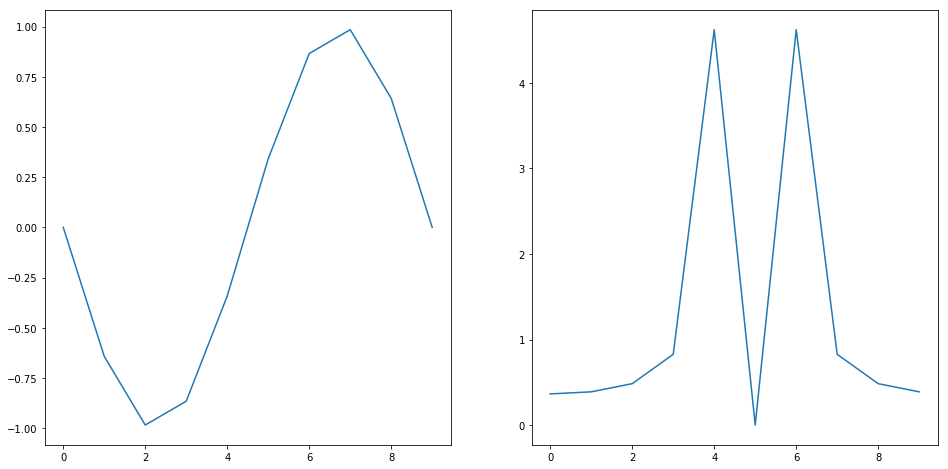

In [2]:
n_samples = 10

components = [1]
weights = [1.0]

signal = np.zeros((n_samples), dtype=np.float)

for c, w in zip(components, weights):
    
    signal = signal + (w * np.sin(np.linspace(-np.pi * c, np.pi * c, n_samples)))

freq = fftpack.fft(signal)

plot_signal_freq(signal, freq)

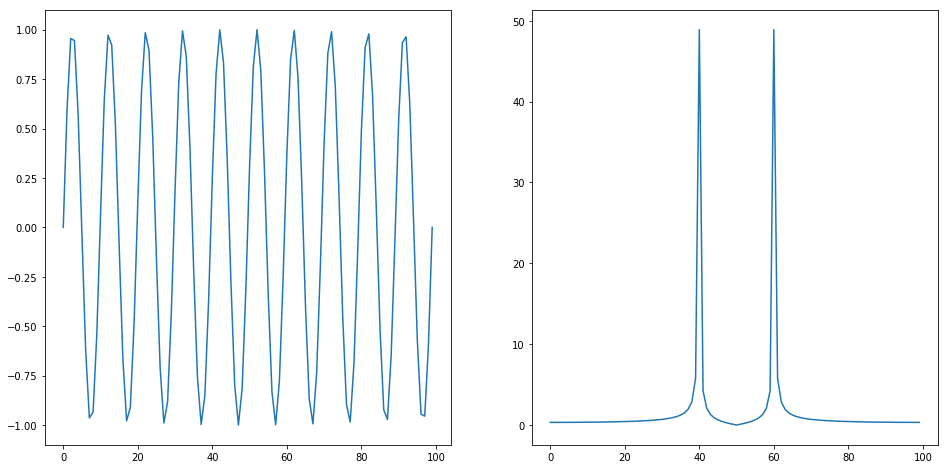

In [3]:
n_samples = 100

components = [10]
weights = [1.0]

signal = np.zeros((n_samples), dtype=np.float)

for c, w in zip(components, weights):
    
    signal = signal + (w * np.sin(np.linspace(-np.pi * c, np.pi * c, n_samples)))

freq = fftpack.fft(signal)

plot_signal_freq(signal, freq)

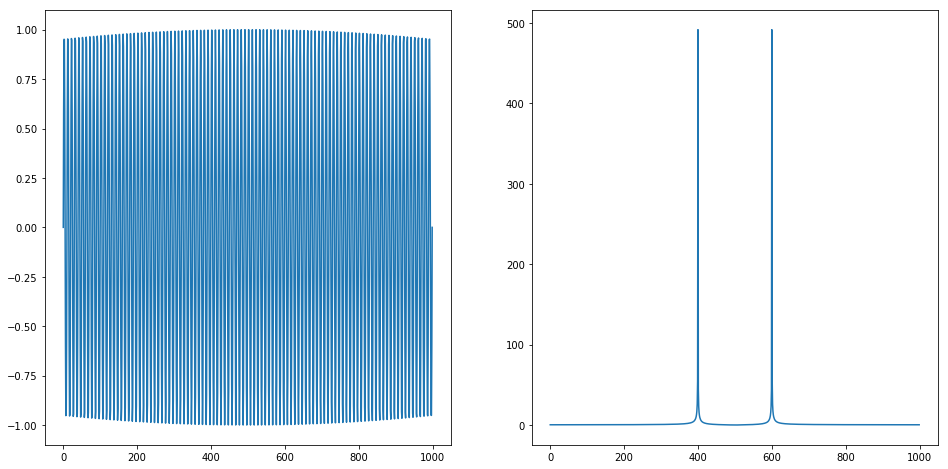

In [4]:
n_samples = 1000

components = [100]
weights = [1.0]

signal = np.zeros((n_samples), dtype=np.float)

for c, w in zip(components, weights):
    
    signal = signal + (w * np.sin(np.linspace(-np.pi * c, np.pi * c, n_samples)))

freq = fftpack.fft(signal)

plot_signal_freq(signal, freq)

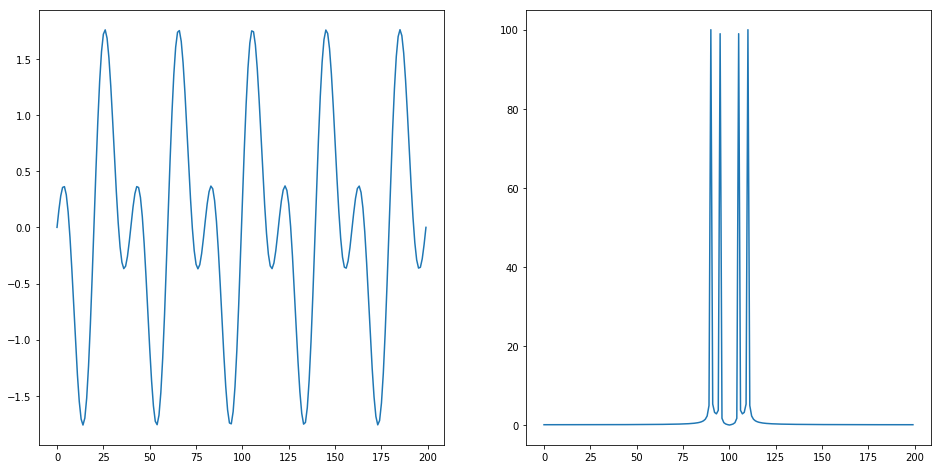

In [5]:
n_samples = 200

components = [5.0, 10.0]
weights = [1.0, 1.0]

signal = np.zeros((n_samples), dtype=np.float)

for c, w in zip(components, weights):
    
    signal = signal + (w * np.sin(np.linspace(-np.pi * c, np.pi * c, n_samples)))

freq = fftpack.fft(signal)

plot_signal_freq(signal, freq)

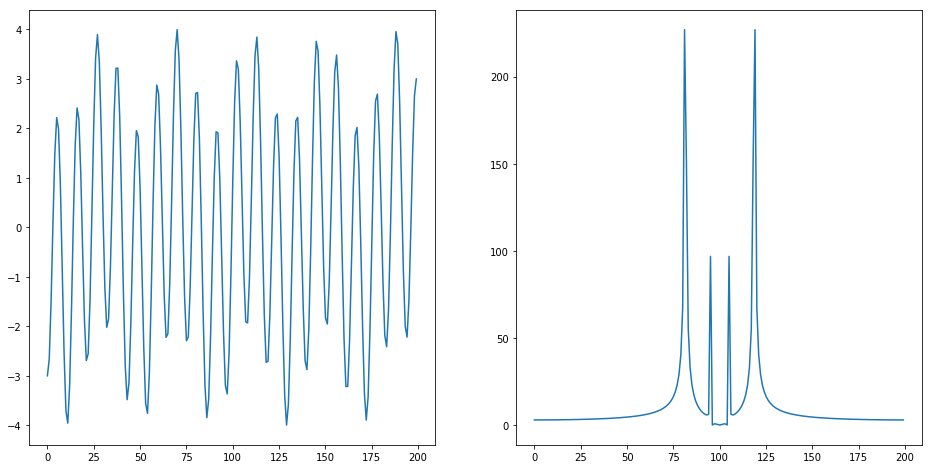

/Users/jefersson/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


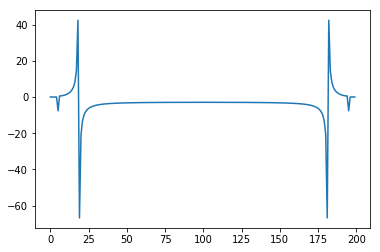

In [6]:
n_samples = 200

components = [5.0, 18.5]
weights = [1.0, 3.0]

signal = np.zeros((n_samples), dtype=np.float)

for c, w in zip(components, weights):
    
    signal = signal + (w * np.sin(np.linspace(-np.pi * c, np.pi * c, n_samples)))

freq = fftpack.fft(signal)

plot_signal_freq(signal, freq)

plt.plot(freq)
plt.show()

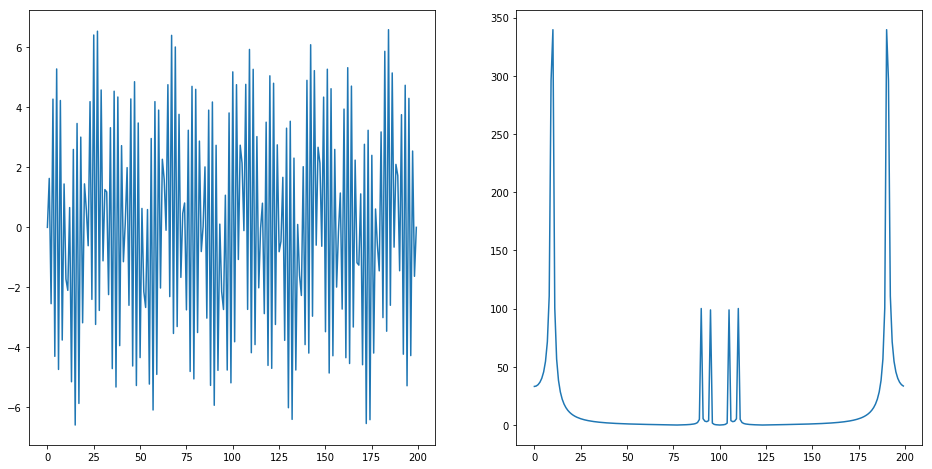

In [7]:
n_samples = 200

components = [5.0, 10.0, 90.0]
weights = [1.0, 1.0, 5.0]

signal = np.zeros((n_samples), dtype=np.float)

for c, w in zip(components, weights):
    
    signal = signal + (w * np.sin(np.linspace(-np.pi * c, np.pi * c, n_samples)))

freq = fftpack.fft(signal)

plot_signal_freq(signal, freq)

[ 297.47851702  138.66451504  352.48247861  368.38989191  122.25388612
  178.59975579  443.50556628  138.36389003  271.44113756  421.97858647]
[ 1.37124684  1.24844817  3.58342834  1.35828618  3.55024046  4.07566155
  1.59084132  4.24928439  3.3115514   3.05627889]


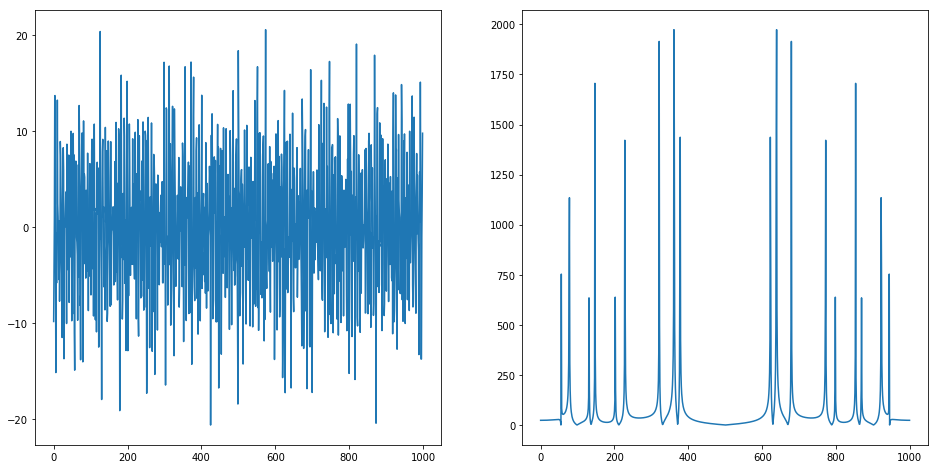

/Users/jefersson/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


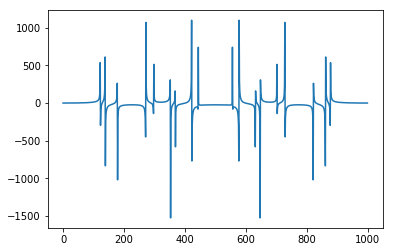

In [8]:
n_samples = 1000

components = np.random.rand(10) * 450
weights = np.random.rand(10) * 5

print(components)
print(weights)

signal = np.zeros((n_samples), dtype=np.float)

for c, w in zip(components, weights):
    
    signal = signal + (w * np.sin(np.linspace(-np.pi * c, np.pi * c, n_samples)))

freq = fftpack.fft(signal)

plot_signal_freq(signal, freq)

plt.plot(freq)
plt.show()

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ..., 
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]


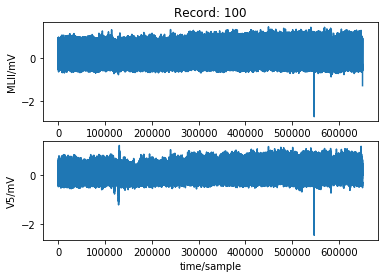

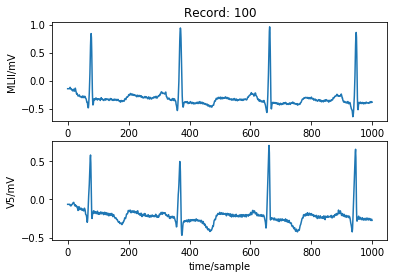

In [10]:
from wfdb import io
from wfdb import plot

header = io.rdrecord('signals/100')

print(header.p_signal)

plot.plot_wfdb(header)

header.p_signal = header.p_signal[0:1000]

plot.plot_wfdb(header)

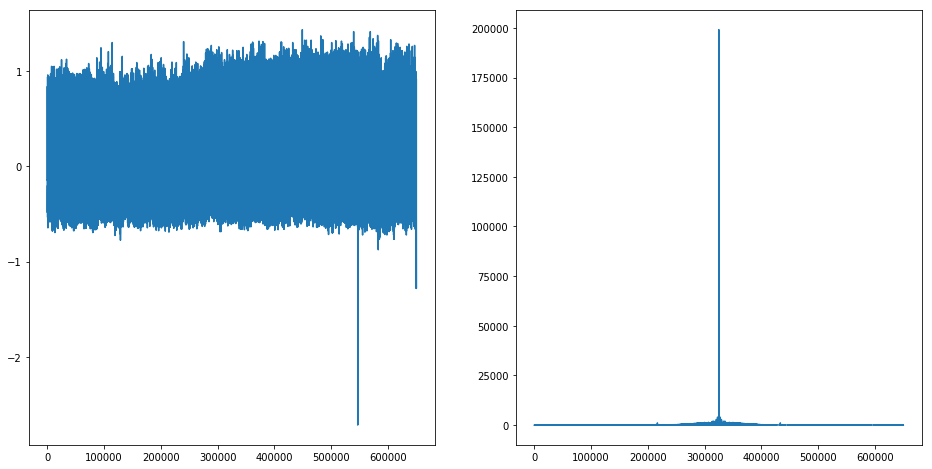

[ -1.99094335e+05   +0.j          -2.72034179e+03+2006.55657871j
  -6.02243575e+02 -552.984029j    -7.44954968e+01  +25.54162196j
  -3.46468831e+02+2523.70674619j   1.44351250e+03 -397.39790647j
   5.52475203e+02 +698.3026849j    1.30621095e+03+1231.76028236j
  -2.87365907e+03+1187.83358635j  -8.25997579e+02 -999.29891694j]


/Users/jefersson/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


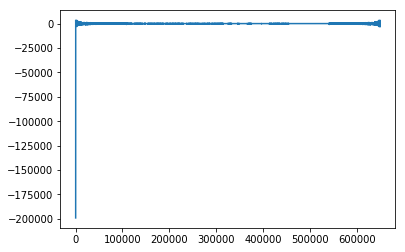

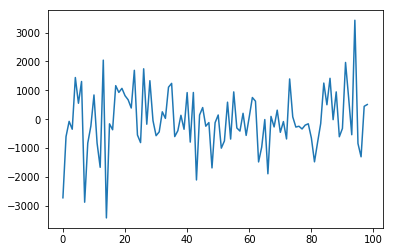

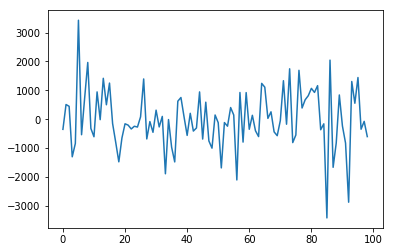

In [11]:
from wfdb import io
from wfdb import plot

header = io.rdrecord('signals/100')

freq = fftpack.fft(header.p_signal[:, 0])

plot_signal_freq(header.p_signal[:, 0], freq)

print(freq[0:10])

plt.plot(freq)
plt.show()

plt.plot(freq[1:100])
plt.show()

plt.plot(freq[-100:-1])
plt.show()

/Users/jefersson/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


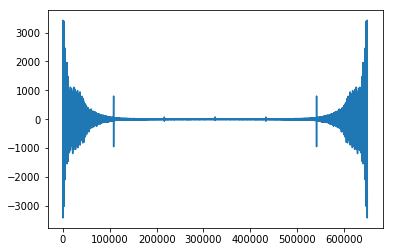

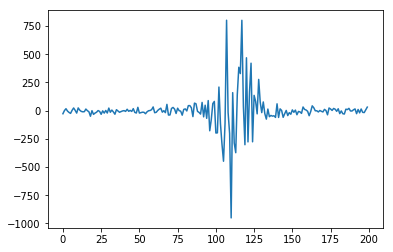

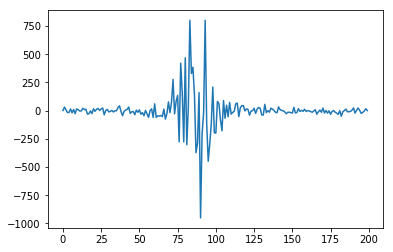

In [12]:
no_dc = freq.copy()
no_dc[0] = 0

plt.plot(no_dc)
plt.show()

plt.plot(freq[108200:108400])
plt.show()

plt.plot(freq[-108400:-108200])
plt.show()

/Users/jefersson/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


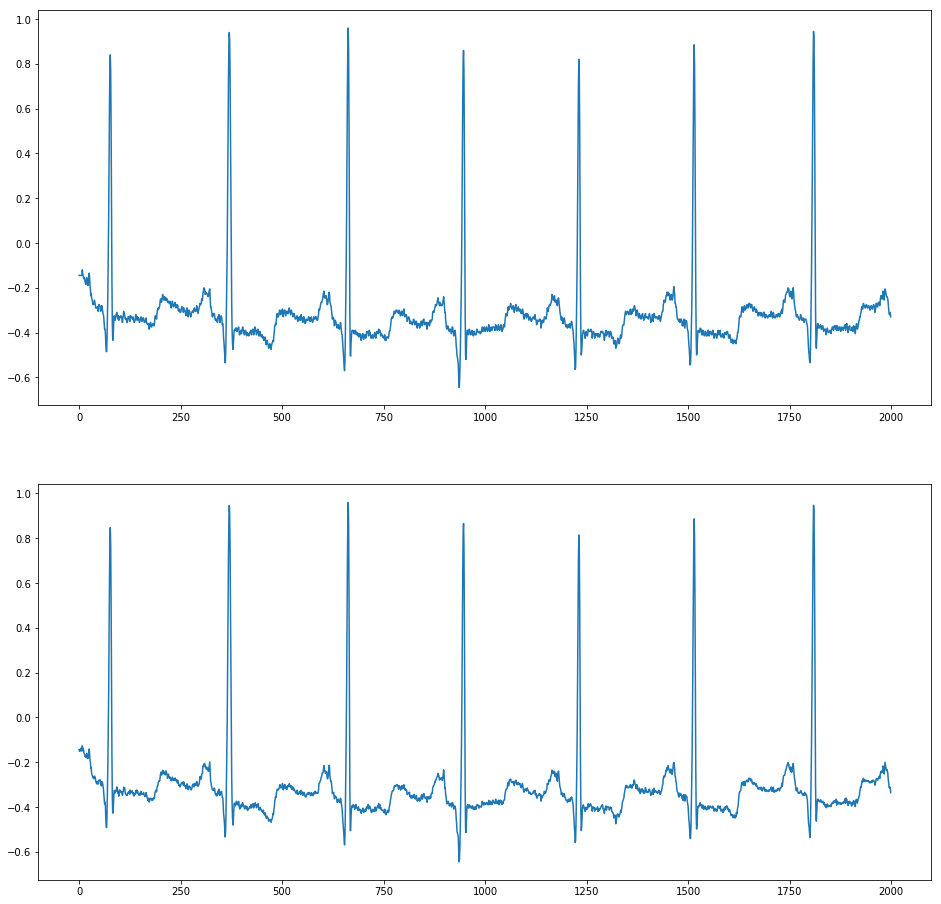

In [13]:
filtered = freq.copy()
filtered[108200:108400] = 0
filtered[-108400:-108200] = 0

recovered = fftpack.ifft(filtered)

# plt.plot(header.p_signal[0:500, 0])
# plt.show()

# plt.plot(recovered[0:500])
# plt.show()


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))

ax1.plot(header.p_signal[0:2000, 0])
ax2.plot(recovered[0:2000])

plt.show()

In [ ]:
from wfdb import io
from wfdb import plot

header = io.rdrecord('signals/100')

freq = fftpack.fft(header.p_signal[:, 0])

no_dc = freq.copy()
no_dc[0] = 0

plot_signal_freq(header.p_signal[:, 0], no_dc)

plt.plot(no_dc)
plt.show()

plt.plot(freq[108200:108400])
plt.show()

plt.plot(freq[-108400:-108200])
plt.show()

filtered = freq.copy()
filtered[108200:108400] = 0
filtered[-108400:-108200] = 0

recovered = fftpack.ifft(filtered)

plt.plot(header.p_signal[0:1000, 0])
plt.show()
plt.plot(recovered[0:1000])
plt.show()